In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
import scipy.io as sio
import os
import networkx as nx
import community as community_louvain
import pickle
import itertools 
from functions_analaysis_connectivity import *
import matplotlib as mt
from matplotlib.colors import LogNorm
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.patches as patches
import scipy.io as sio
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
path = 'data_connectivity/'
#loading tractograpy
tract = sio.loadmat(path+'FSe_tractography.mat')
cortex_acr = [tract['area_list_Sean_89'][0][l][0] for l in range(89)] 
dist = 10**(tract['FSe_tractography_Sean_order'])
mat = 10**(tract['FSe_tractography_Sean_order'])
hier_tract =sio.loadmat(path+'hierarchy_89_areas.mat')
sln_pred = sio.loadmat(path+'sln_real_and_pred.mat')
t1_t2 = sio.loadmat(path+'myelin_hierarchy_order.mat')
ind_t1_t2 = np.argsort(-t1_t2['myelin_hierarchy_order'][:,0])
t1_t2_val = t1_t2['myelin_hierarchy_order'][:,0] # value t1/t2
coords_data = sio.loadmat(path +'central_vertex_coords.mat')
coords = coords_data['central_vertex_coords']

spines27  = sio.loadmat(path+'spine_data_27.mat')
h_tract = np.array([x for x in hier_tract['hierarchy_vals_fullgraph'][:,0]])
# loading kennedy's data
con_ken = sio.loadmat(path+'beta_bin_hierarchy_subgraph.mat')
acr_ken = [con_ken['subgraph_hierarchical_order'][l][0][0] for l in range(40)]
mat_ken = con_ken['HierOrderedFLNsubgraph']
sln_ken = con_ken['HierOrderedSLNsubgraph']
#loading spine count
spines = np.array([x for x in sio.loadmat(path+'spines_inferred.mat')['spine_count_40'][:,0]])

In [4]:
sln_test = sio.loadmat(path+'FLN_SLN_89_areas.mat')

In [12]:
[x[0] for x in sln_test['fullgraph_hierarchical_order'][0]]

['V1',
 'V2',
 'V3',
 'V4',
 '1',
 '3',
 'MT',
 'V6',
 'V6A',
 'DP',
 'V4t',
 'V3A',
 'TEOm',
 'TEO',
 '8m',
 'F4',
 '5',
 '2',
 '8l',
 'F1',
 'STPc',
 '31',
 'PIP',
 '7a',
 '45B',
 'FST',
 '10',
 'F3',
 'TEpd',
 '46d',
 'PBc',
 '9/46v',
 'LB',
 '7op',
 'MST',
 'PBr',
 'AIP',
 '9/46d',
 'F5',
 '44',
 'VIP',
 '7m',
 'MIP',
 '25',
 'TPt',
 'LIP',
 '8r',
 '32',
 'STPi',
 '23',
 'SII',
 '9',
 '14',
 '46v',
 '45A',
 '8B',
 'PGa',
 'TEa/mp',
 'F6',
 '7b',
 '12',
 'F2',
 'F7',
 'ProM',
 '24d',
 'Pro.St.',
 'STPr',
 'IPa',
 '24c',
 'CORE',
 'TEpv',
 '29/30',
 '24a',
 '11',
 'MB',
 'INS',
 '13',
 '24b',
 'TEa/ma',
 'TEad',
 'OPAI',
 'OPRO',
 'POLE',
 'TEav',
 'TH/TF',
 'Pi',
 'Gu',
 'PERI',
 'ENTO']

In [4]:
# difusssion map data
psi = diffussion_map(dist)
rank, ind_rank, acr_rank = euclidian_distance(psi, cortex_acr, 'V1')

#community discovery analysis
if False:
    mat_com = realizations_louvain(mat, 10000)
    pickle.dump(mat_com, open('generated_data/clusters_louvain.p','wb'))
mat_com = pickle.load(open('generated_data/clusters_louvain.p','rb'))   

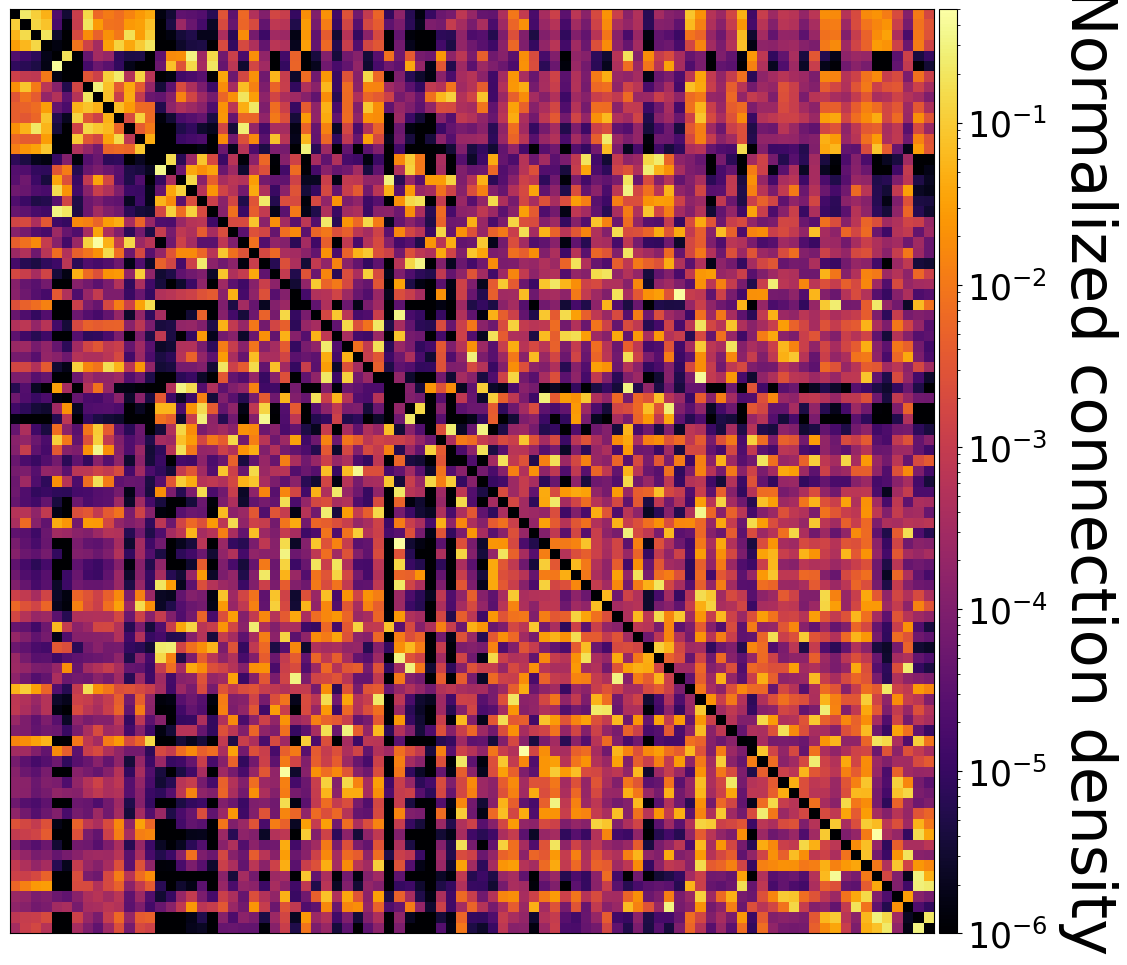

In [5]:
#cortico_thalamic = np.array([mat[thal_ind_fine[ind_rank_thal[l]],ind_selected_areas] for l in range(40)])
bel_size =20
tick_size = 20
cbar_tick_size = 25
fig = plt.figure(figsize = (20,12))
plt.subplots_adjust(hspace = 0.4,wspace = 0.3)

ax = fig.add_subplot(111)
im1 = ax.imshow(mat,norm=LogNorm(vmin=1e-6, vmax=.5), cmap='inferno')
ax.set_xticks([])
ax.set_yticks([])
#ax.set_xticklabels(acr_rank_thal, rotation = 90)
ax.tick_params(axis='both', which='major', labelsize=tick_size)


# Add the patch to the Axes
#rect = patches.Rectangle((40-.8, 45-.8), 1.5, 1.5, linewidth=5, edgecolor='g', facecolor='none')

#ax.add_patch(rect)


#ax.set_yticks(np.arange(0,mat_selected.shape[0],1))
#ax.set_yticklabels(selected_areas)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.05)
cbar = fig.colorbar(im1,cax=cax, orientation='vertical')
cbar.set_label('Normalized connection density', rotation=270, fontsize  = 45,labelpad=50)
cbar.ax.tick_params(labelsize=cbar_tick_size) 
#ax.set_ylabel('Surce region Cortex',fontsize = label_size)
#ax.set_xlabel('Target region Thalamus',fontsize = label_size)
#ax.set_title('Corticothalamic projections', fontsize = label_size, y= 1.02)
#plt.savefig('figures/fig1A.pdf',bbox_inches = 'tight',transparent = True)


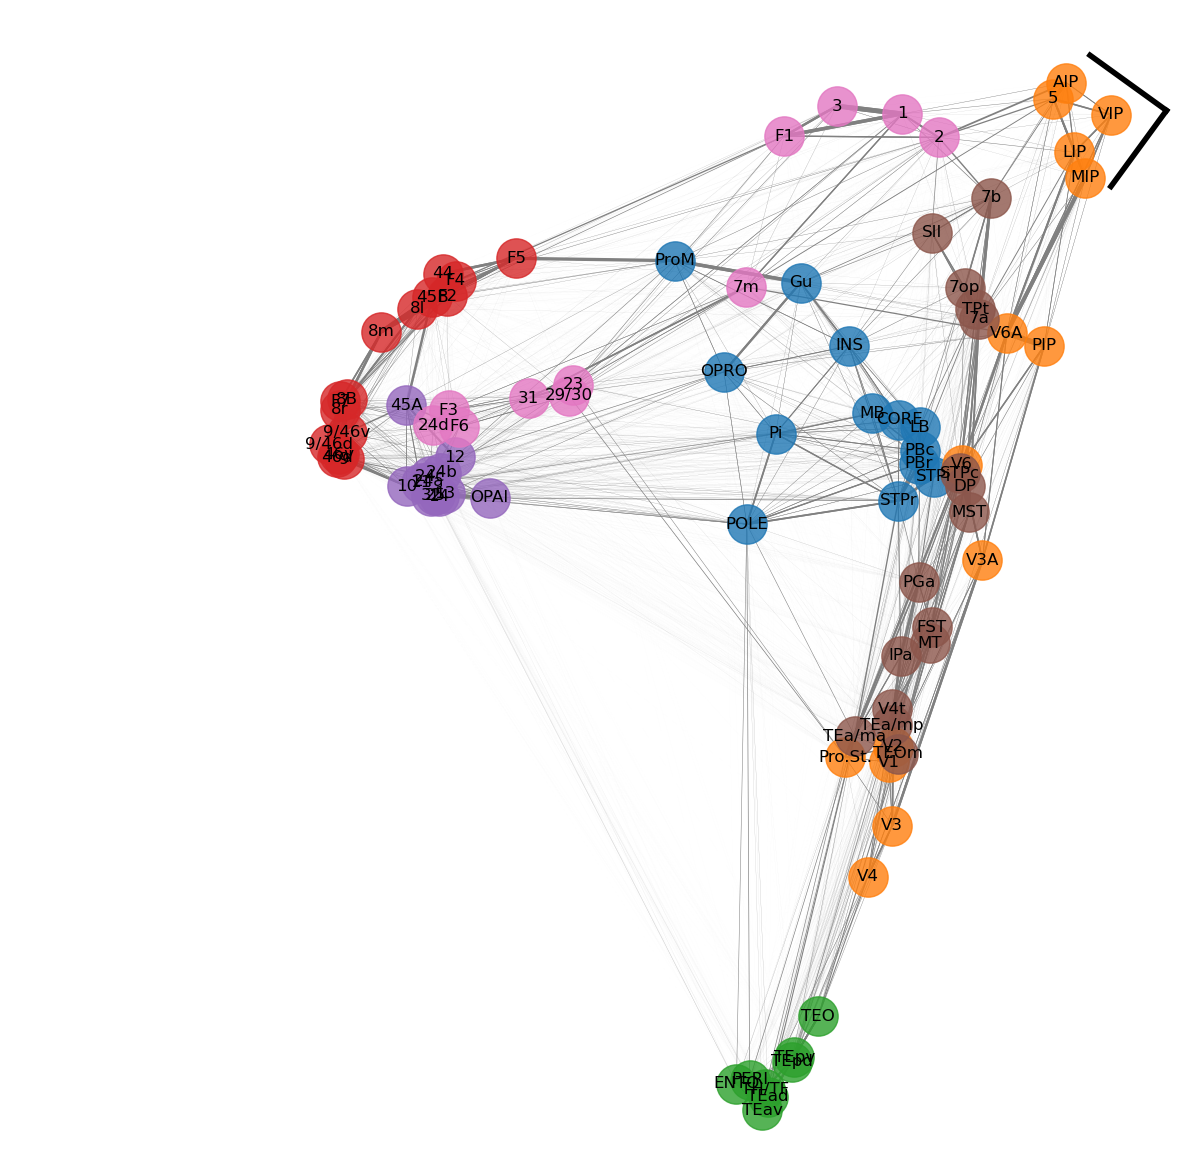

In [6]:
t= 0 
mat_ord = mat#np.arrange([[mat[i,j] for j in ind_rank] for i in ind_rank])
G = nx.from_numpy_array(mat_ord)
#partition = community_louvain.best_partition(G)
partition = louvain(mat_com)
edges = G.edges()


rotation = lambda x: np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
psi_rot = lambda x:np.einsum('ij,lj->li', rotation(x), psi(t)[:, 1:3])



theta =   (4 * np.pi)/5.



pos = {}
for l in range(89):
    #pos[l]= (psi(t)[l,1].real,psi(t)[l,2].real)  # positions for all nodes
    pos[l]= (psi_rot(theta)[l, 0].real, psi_rot(theta)[l,1].real) 
M = G.number_of_edges()

origin_x = -.07
origin_y = -.26
x = np.array([np.linspace(0, .04, 1000) + origin_x, origin_y *  np.ones(1000)]) 
y = np.array([ origin_x * np.ones(1000), np.linspace(0, .04, 1000) + origin_y ]) 

x_axis = np.einsum('ij,jl->li',rotation(theta), x) 
y_axis = np.einsum('ij,jl->li',rotation(theta), y) 



fig, ax = plt.subplots(figsize = (15,15))

# nodes
all_nodes = [x for x in range(89)]
#colors = plt.cm.tab10()
#colors = ['b','r','g','m','c','orange','cyan','y','gray','k']
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 800, node_color =  [plt.cm.tab10(count-1)], alpha = 0.8)
    list_edges = [x for x in itertools.product(all_nodes,list_nodes)]
    all_nodes = [x for x in all_nodes if x not in list_nodes]
    weights = [4 * (G[u][v]['weight']-np.min(mat))/(np.max(mat)-np.min(mat)) for u,v in list_edges]
    nx.draw_networkx_edges(G,pos,edgelist=list_edges,width=weights,edge_color='gray')

#nx.draw_networkx_edges(G, pos,
 #   width=weights *4
                               
#)
#edges[0].set_alpha(1)

# some math labels
labels = {}
for l in range(0,89):
    labels[l] = cortex_acr[l]

nx.draw_networkx_labels(G, pos, labels, font_size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_min = np.min(psi(t)[:,1].real)
x_max = np.max(psi(t)[:,1].real)
ax.set_xlim([-.28, .212])
ax.set_ylim([-.28, .212])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.plot(x_axis[:, 0], x_axis[:, 1], color = 'k', lw = 4)
ax.plot(y_axis[:, 0], y_axis[:, 1], color = 'k', lw = 4)


#ax.set_title('Tractography  macaque monkey', fontsize = 30, y=1.02)
#plt.savefig('figures/fig1_B.png',bbox_inches = 'tight')

In [12]:
com = 3
#0, 2, 3
ind_areas_interest = []
ind_areas_frontal = []
for com in range(10):
    if com in [0,2,3]:
        list_nodes = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
        ind_areas_interest = ind_areas_interest + list_nodes        
    else:
        list_nodes_frontal = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
        ind_areas_frontal = ind_areas_frontal + list_nodes_frontal


frontal_acr = []
for i in ind_areas_frontal:
    #print(cortex_acr[i])
    frontal_acr.append(cortex_acr[i])



t = 0
psi_x = []
psi_y = []
for l in ind_areas_frontal:
    psi_x.append(psi(t)[l,1].real)
    psi_y.append(psi(t)[l,2].real)
psi_x = np.array(psi_x)
psi_y = np.array(psi_y)

psi_x = psi_x.reshape(-1, 1)
psi_y = psi_y.reshape(-1, 1)
reg_frontal = LinearRegression().fit(psi_x, psi_y)





t = 0
xi_x = []
xi_y = []
for l in ind_areas_interest:
    xi_x.append(psi(t)[l,1].real)
    xi_y.append(psi(t)[l,2].real)
xi_x = np.array(xi_x)
xi_y = np.array(xi_y)
xi_x = xi_x.reshape(-1, 1)
xi_y = xi_y.reshape(-1, 1)
reg_interest = LinearRegression().fit(xi_x, xi_y)



#interesection of the frontal and dorsal-ventral axis
x_origin = (reg_frontal.intercept_ - reg_interest.intercept_)/(reg_interest.coef_[0] - reg_frontal.coef_[0])
y_origin =  reg_frontal.coef_[0]* x_origin + reg_frontal.intercept_
origin = np.array([x_origin[0], y_origin[0]])

fun_interest = lambda y: reg_interest.coef_[0]* y + reg_interest.intercept_
fun_frontal= lambda y: reg_frontal.coef_[0]* y + reg_frontal.intercept_
axis_interest = np.array([-.15 - x_origin[0],fun_interest(-.15)[0] - y_origin[0] ])
axis_interest  = axis_interest

axis_frontal = np.array([.15 - x_origin[0],fun_frontal(.15)[0] - y_origin[0]])
axis_frontal  = axis_frontal

u1 = axis_interest-origin
const = np.dot(axis_frontal-origin,u1)/(np.dot(u1,u1))
u2 = axis_frontal-origin - const * axis_interest 

int_norm = axis_interest/np.linalg.norm(axis_interest)
frontal_norm = axis_frontal/np.linalg.norm(axis_frontal)

x_axis_origin = np.array([1,0])-origin
x_axis_origin = x_axis_origin/np.linalg.norm(x_axis_origin)
rotation = lambda x: np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
ang_rotation = np.arccos(np.dot(int_norm, x_axis_origin))

psi_org =psi(t)[:, 1:3]- np.outer(np.ones(89), origin)
psi_org =np.array([psi_org[l,:].real for l in range(psi_org.shape[0])])
psi_rot = lambda x:np.einsum('ij,lj->li', rotation(x), psi_org)
psi_new = psi_rot(-ang_rotation)



# projections on the axis of interest
proj_areas_interest = []
for l in range(89):
    proj_areas_interest.append(int_norm.dot(psi_org[l,:]) * int_norm + origin)
proj_areas_interest = np.array(proj_areas_interest)



# projections on the axis of interest
proj_frontal = []
for l in range(89):
    proj_frontal.append(frontal_norm.dot(psi_org[l,:]) * frontal_norm + origin)
proj_frontal = np.array(proj_frontal)


org = np.array([x_origin[0], y_origin[0]])

#distance in the visual axis
v1 = axis_interest - org # proj_areas_interest[cortex_acr.index('V1'),:] 
v1 = v1/np.linalg.norm(v1)
val_areas_interest = proj_areas_interest -   org.transpose()# proj_areas_interest[cortex_acr.index('V1'),:] 
distance_to_v1 = val_areas_interest.dot(v1) 
#pickle.dump(distance_to_v1, open('../connectivity_data/distance_ventral_dorsal_axis.p', 'wb'))


#minimum frontal axis

frontal_axis_min = axis_frontal - org
frontal_axis_min = frontal_axis_min/np.linalg.norm(frontal_axis_min)
val_areas_frontal = proj_frontal -  org.transpose()
distance_to_frontal= val_areas_frontal.dot(frontal_axis_min ) 
#pickle.dump(distance_to_frontal, open('../connectivity_data/distance_frontal_axis.p', 'wb'))
np.arccos(v1.dot(frontal_axis_min)) * (180/(np.pi))


sorted_dist_dv = []
sorted_acr_dv = []
sorted_ind_dv = []
for val in np.sort(distance_to_v1):
    ind = np.where(val==distance_to_v1)[0][0]
    if ind in ind_areas_interest: 
        sorted_dist_dv.append(val)
        sorted_acr_dv.append(cortex_acr[ind])
        sorted_ind_dv.append(ind)
sorted_dist_dv = np.array(sorted_dist_dv)
sorted_dist_dv = (sorted_dist_dv - np.min(sorted_dist_dv))/(np.max(sorted_dist_dv)- np.min(sorted_dist_dv))

In [26]:
i = 0
color_map_dv = []
for acr in sorted_acr_dv:
    #list_nodes = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
    col = matplotlib.colors.rgb2hex(matplotlib.cm.coolwarm(sorted_dist_dv[i]))
    print(acr)
    color_map_dv.append(col)
    i+=1

pickle.dump((sorted_acr_dv, color_map_dv), open('colormap_dv.p', 'wb'))

AIP
5
VIP
LIP
MIP
7b
SII
7op
TPt
7a
V6A
PIP
V6
STPc
DP
MST
V3A
PGa
FST
MT
IPa
V4t
TEa/mp
TEa/ma
V2
TEOm
V1
Pro.St.
V3
V4
TEO
TEpv
TEpd
PERI
TH/TF
ENTO
TEad
TEav


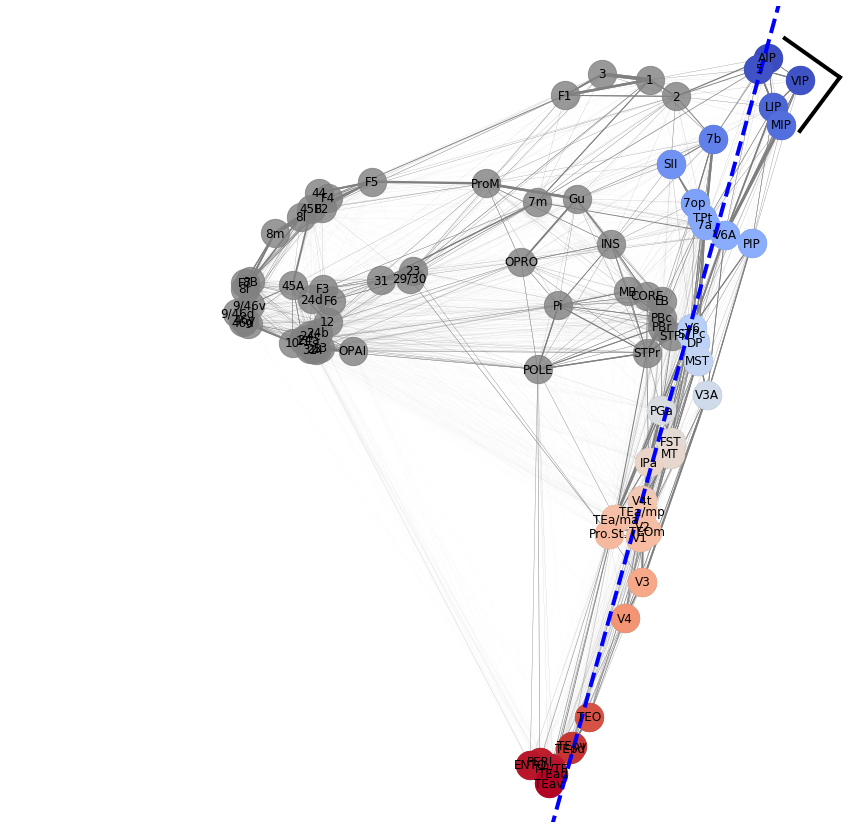

In [13]:
t= 0 
mat_ord = mat#np.arrange([[mat[i,j] for j in ind_rank] for i in ind_rank])
G = nx.from_numpy_matrix(mat_ord)
#partition = community_louvain.best_partition(G)
partition = louvain(mat_com)
edges = G.edges()

# Rotation matrix
rotation = lambda x: np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
psi_rot = lambda x:np.einsum('ij,lj->li', rotation(x), psi(t)[:, 1:3])
origin_x = -.07
origin_y = -.26
x = np.array([np.linspace(0, .04, 1000) + origin_x, origin_y *  np.ones(1000)]) 
y = np.array([ origin_x * np.ones(1000), np.linspace(0, .04, 1000) + origin_y ]) 

theta =   (4 * np.pi)/5.
x_axis = np.einsum('ij,jl->li',rotation(theta), x) 
y_axis = np.einsum('ij,jl->li',rotation(theta), y) 

pos = {}
for l in range(89):
    #pos[l]= (psi(t)[l,1].real,psi(t)[l,2].real)  # positions for all nodes
    pos[l]= (psi_rot(theta)[l, 0].real, psi_rot(theta)[l,1].real) 
M = G.number_of_edges()





fig, ax = plt.subplots(figsize = (15,15))
# nodes
all_nodes = [x for x in range(89)]
colors = ['gray','gray','gray','gray','gray','gray','gray','gray','gray','k']
count = 0

for com in set(partition.values()) :
    count = count + 1
    list_nodes = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 800, node_color = colors[count], alpha = 0.8)
    list_edges = [x for x in itertools.product(all_nodes,list_nodes)]
    all_nodes = [x for x in all_nodes if x not in list_nodes]
    weights = [4 * (G[u][v]['weight']-np.min(mat))/(np.max(mat)-np.min(mat)) for u,v in list_edges]
    nx.draw_networkx_edges(G,pos,edgelist=list_edges,width=weights,edge_color='gray')

count = 0
list_nodes =[cortex_acr.index('LIP')] 
for com in sorted_ind_dv:
    #list_nodes = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
    col = matplotlib.colors.rgb2hex(matplotlib.cm.coolwarm(sorted_dist_dv[count]))
    nx.draw_networkx_nodes(G, pos, [sorted_ind_dv[count]], node_size = 800, node_color = col, alpha = 1.)
    list_edges = [x for x in itertools.product(all_nodes,list_nodes)]
    all_nodes = [x for x in all_nodes if x not in list_nodes]
    weights = [4 * (G[u][v]['weight']-np.min(mat))/(np.max(mat)-np.min(mat)) for u,v in list_edges]
    nx.draw_networkx_edges(G,pos,edgelist=list_edges,width=weights,edge_color='gray')
    count = count + 1



#nx.draw_networkx_edges(G, pos,
 #   width=weights *4
                               
#)
#edges[0].set_alpha(1)

# some math labels
labels = {}
for l in range(0,89):
    labels[l] = cortex_acr[l]

nx.draw_networkx_labels(G, pos, labels, font_size=12)
#ax.set_xlabel('Gradient 1', fontsize = 30)
#ax.set_ylabel('Gradient 2', fontsize = 30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_min = np.min(psi(t)[:,1].real)
x_max = np.max(psi(t)[:,1].real)


x_min = np.min(psi(t)[:,1].real)
x_max = np.max(psi(t)[:,1].real)
#ax.set_xlim([ x_min-.02, x_max+0.02])
#ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

#vmin = np.min(-t1_t2_val)
#vmax = np.max(-t1_t2_val)


#sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin = vmin, vmax=vmax))
#sm._A = []
#fig.colorbar(sm)

ax.plot(x_axis[:, 0], x_axis[:, 1], color = 'k', lw = 4)
ax.plot(y_axis[:, 0], y_axis[:, 1], color = 'k', lw = 4)




x = np.array([np.linspace(-0.1, 0.18, 100), np.linspace(-0.1, 0.18, 100) * reg_frontal.coef_[0] + reg_frontal.intercept_])
y = np.array([ np.linspace(-0.2, 0.0, 100), np.linspace(-0.2, 0.0, 100) * reg_interest.coef_[0] + reg_interest.intercept_])

x_axis = np.einsum('ij,jl->li',rotation(theta), x) 
y_axis = np.einsum('ij,jl->li',rotation(theta), y) 

#ax.plot(x_axis[:, 0], x_axis[:, 1], color = 'b', lw = 2, alpha = 1)
ax.plot(y_axis[:, 0], y_axis[:, 1], color = 'b', lw = 4, alpha = 1, ls = '--')



ax.set_xlim([-.28, .212])
ax.set_ylim([-.28, .212])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#ax.set_xlim([ x_min-.02, x_max+0.02])
#ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
#ax.set_xticks([-.2,-0.1,0,0.1])
#ax.set_xticklabels([-.2,-0.1,0,0.1])
#ax.set_yticks([-0.1,0,0.1, .2])
#ax.set_yticklabels([-0.1,0,0.1, .2])
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)
#ax.set_title('Tractography  macaque monkey', fontsize = 30, y=1.02)
#plt.savefig('figures/fig1_C.png',bbox_inches = 'tight', transparent = True)

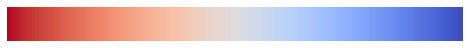

In [12]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
fig, axes = plt.subplots(figsize=(8,.5))
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
axes.imshow(-gradient, aspect='auto', cmap=plt.get_cmap('coolwarm'))
axes.set_axis_off()
plt.savefig('figures/colorbar_dorsal_vs_ventral.pdf',bbox_inches = 'tight', transparent = True)

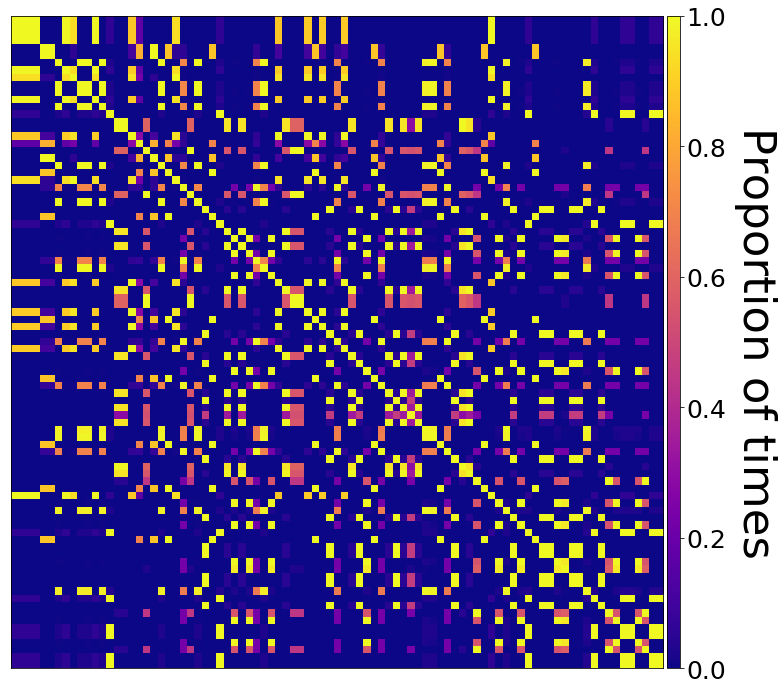

In [22]:
#cortico_thalamic = np.array([mat[thal_ind_fine[ind_rank_thal[l]],ind_selected_areas] for l in range(40)])
bel_size =20
tick_size = 20
cbar_tick_size = 25
fig = plt.figure(figsize = (20,12))
plt.subplots_adjust(hspace = 0.4,wspace = 0.3)

ax = fig.add_subplot(111)
im1 = ax.imshow(mat_com, cmap='plasma')
ax.set_xticks([])
ax.set_yticks([])
#ax.set_xticklabels(acr_rank_thal, rotation = 90)
ax.tick_params(axis='both', which='major', labelsize=tick_size)


# Add the patch to the Axes
#rect = patches.Rectangle((40-.8, 45-.8), 1.5, 1.5, linewidth=5, edgecolor='g', facecolor='none')

#ax.add_patch(rect)


#ax.set_yticks(np.arange(0,mat_selected.shape[0],1))
#ax.set_yticklabels(selected_areas)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.05)
cbar = fig.colorbar(im1,cax=cax, orientation='vertical')
cbar.set_label('Proportion of times', rotation=270, fontsize  = 45,labelpad=50)
cbar.ax.tick_params(labelsize=cbar_tick_size) 
#ax.set_ylabel('Surce region Cortex',fontsize = label_size)
#ax.set_xlabel('Target region Thalamus',fontsize = label_size)
#ax.set_title('Corticothalamic projections', fontsize = label_size, y= 1.02)
plt.savefig('figures/S1A.pdf',bbox_inches = 'tight',transparent = True)


[14, 15, 18, 24, 29, 31, 37, 38, 39, 46, 51, 53, 55, 61, 62]


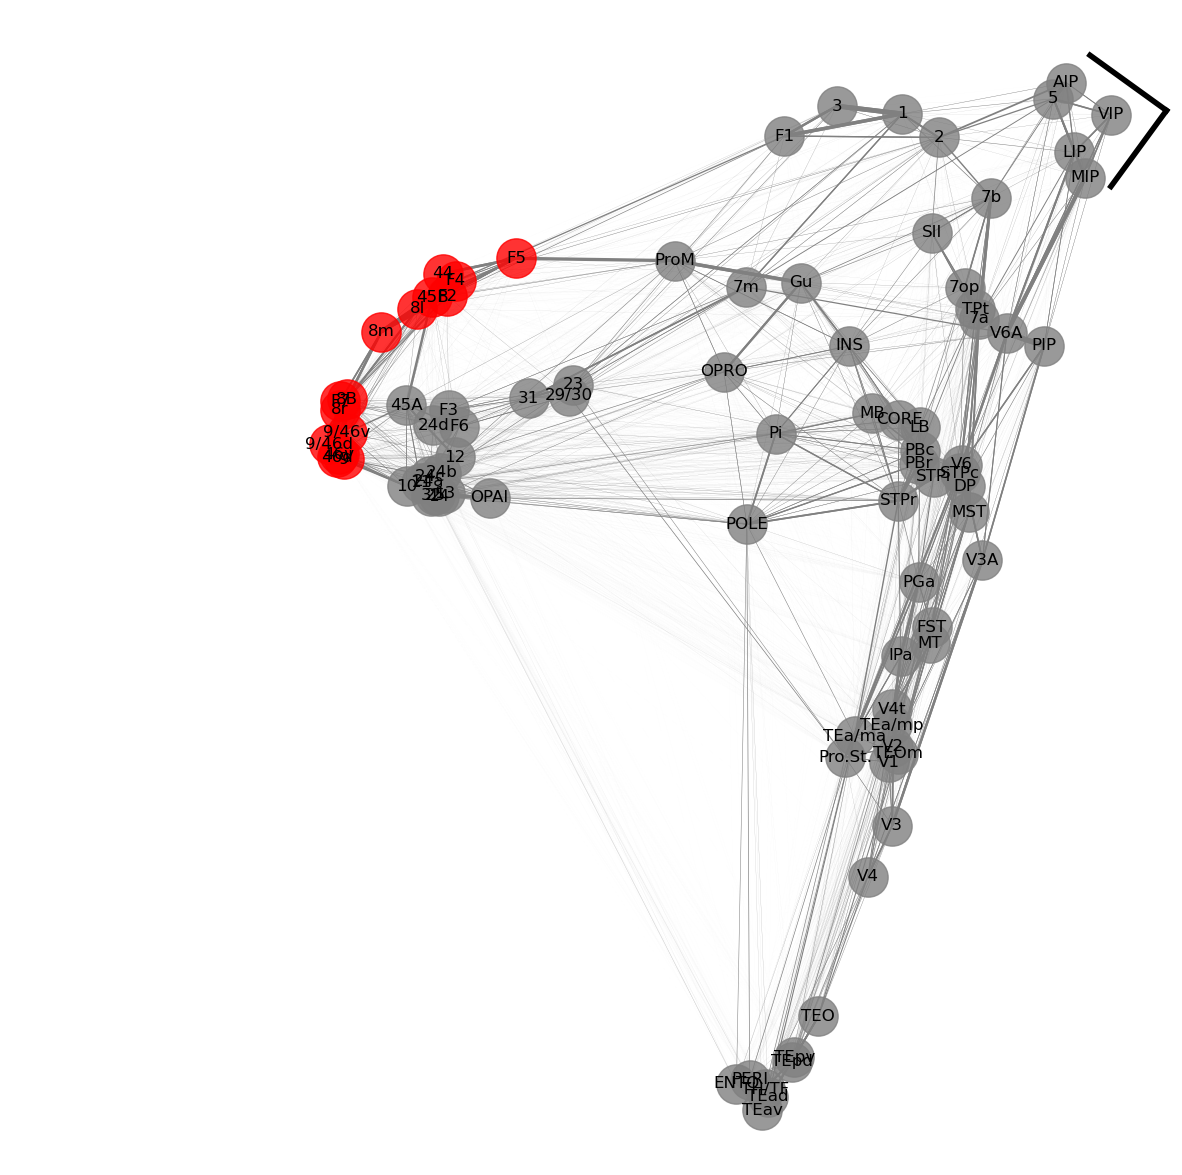

In [32]:
t= 0 
mat_ord = mat#np.arrange([[mat[i,j] for j in ind_rank] for i in ind_rank])
G = nx.from_numpy_array(mat_ord)
#partition = community_louvain.best_partition(G)
partition = louvain(mat_com)
edges = G.edges()


rotation = lambda x: np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
psi_rot = lambda x:np.einsum('ij,lj->li', rotation(x), psi(t)[:, 1:3])



theta =   (4 * np.pi)/5.



pos = {}
for l in range(89):
    #pos[l]= (psi(t)[l,1].real,psi(t)[l,2].real)  # positions for all nodes
    pos[l]= (psi_rot(theta)[l, 0].real, psi_rot(theta)[l,1].real) 
M = G.number_of_edges()

origin_x = -.07
origin_y = -.26
x = np.array([np.linspace(0, .04, 1000) + origin_x, origin_y *  np.ones(1000)]) 
y = np.array([ origin_x * np.ones(1000), np.linspace(0, .04, 1000) + origin_y ]) 

x_axis = np.einsum('ij,jl->li',rotation(theta), x) 
y_axis = np.einsum('ij,jl->li',rotation(theta), y) 



fig, ax = plt.subplots(figsize = (15,15))

# nodes
all_nodes = [x for x in range(89)]
#colors = plt.cm.tab10()
#colors = ['b','r','g','m','c','orange','cyan','y','gray','k']
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
    if count == 3:
        print(list_nodes)
        node_color = 'red'
    else:
        node_color = 'gray'
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 800, node_color =  [node_color], alpha = 0.8)
    list_edges = [x for x in itertools.product(all_nodes,list_nodes)]
    all_nodes = [x for x in all_nodes if x not in list_nodes]
    weights = [4 * (G[u][v]['weight']-np.min(mat))/(np.max(mat)-np.min(mat)) for u,v in list_edges]
    nx.draw_networkx_edges(G,pos,edgelist=list_edges,width=weights,edge_color='gray')

#nx.draw_networkx_edges(G, pos,
 #   width=weights *4
                               
#)
#edges[0].set_alpha(1)

# some math labels
labels = {}
for l in range(0,89):
    labels[l] = cortex_acr[l]

nx.draw_networkx_labels(G, pos, labels, font_size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_min = np.min(psi(t)[:,1].real)
x_max = np.max(psi(t)[:,1].real)
ax.set_xlim([-.28, .212])
ax.set_ylim([-.28, .212])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.plot(x_axis[:, 0], x_axis[:, 1], color = 'k', lw = 4)
ax.plot(y_axis[:, 0], y_axis[:, 1], color = 'k', lw = 4)
#plt.savefig('figures/prefrontal_cluster.png',bbox_inches = 'tight')


[4, 5, 17, 19, 21, 27, 41, 49, 58, 64, 71]


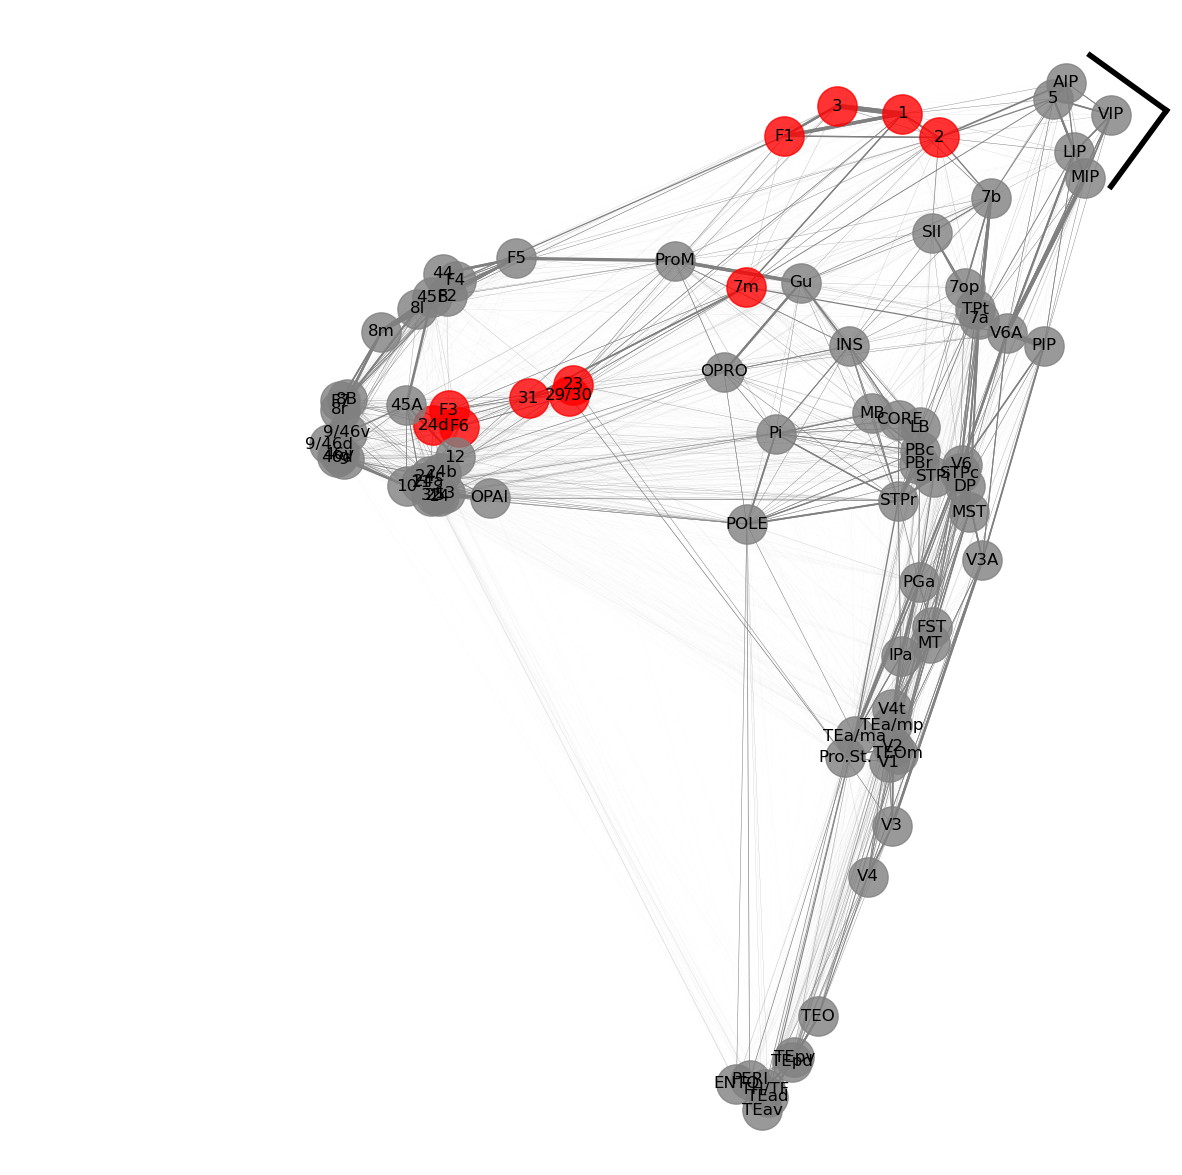

In [43]:
t= 0 
mat_ord = mat#np.arrange([[mat[i,j] for j in ind_rank] for i in ind_rank])
G = nx.from_numpy_array(mat_ord)
#partition = community_louvain.best_partition(G)
partition = louvain(mat_com)
edges = G.edges()


rotation = lambda x: np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
psi_rot = lambda x:np.einsum('ij,lj->li', rotation(x), psi(t)[:, 1:3])



theta =   (4 * np.pi)/5.



pos = {}
for l in range(89):
    #pos[l]= (psi(t)[l,1].real,psi(t)[l,2].real)  # positions for all nodes
    pos[l]= (psi_rot(theta)[l, 0].real, psi_rot(theta)[l,1].real) 
M = G.number_of_edges()

origin_x = -.07
origin_y = -.26
x = np.array([np.linspace(0, .04, 1000) + origin_x, origin_y *  np.ones(1000)]) 
y = np.array([ origin_x * np.ones(1000), np.linspace(0, .04, 1000) + origin_y ]) 

x_axis = np.einsum('ij,jl->li',rotation(theta), x) 
y_axis = np.einsum('ij,jl->li',rotation(theta), y) 



fig, ax = plt.subplots(figsize = (15,15))

# nodes
all_nodes = [x for x in range(89)]
#colors = plt.cm.tab10()
#colors = ['b','r','g','m','c','orange','cyan','y','gray','k']
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [int(nodes) for nodes in partition.keys() if partition[nodes] == com]
    if count == 1:
        print(list_nodes)
        node_color = 'red'
    else:
        node_color = 'gray'
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 800, node_color =  [node_color], alpha = 0.8)
    list_edges = [x for x in itertools.product(all_nodes,list_nodes)]
    all_nodes = [x for x in all_nodes if x not in list_nodes]
    weights = [4 * (G[u][v]['weight']-np.min(mat))/(np.max(mat)-np.min(mat)) for u,v in list_edges]
    nx.draw_networkx_edges(G,pos,edgelist=list_edges,width=weights,edge_color='gray')

#nx.draw_networkx_edges(G, pos,
 #   width=weights *4
                               
#)
#edges[0].set_alpha(1)

# some math labels
labels = {}
for l in range(0,89):
    labels[l] = cortex_acr[l]

nx.draw_networkx_labels(G, pos, labels, font_size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_min = np.min(psi(t)[:,1].real)
x_max = np.max(psi(t)[:,1].real)
ax.set_xlim([-.28, .212])
ax.set_ylim([-.28, .212])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.plot(x_axis[:, 0], x_axis[:, 1], color = 'k', lw = 4)
ax.plot(y_axis[:, 0], y_axis[:, 1], color = 'k', lw = 4)
plt.savefig('figures/cingulate_cluster.png',bbox_inches = 'tight')